# Data Readiness
--------------
Before conducting the analysis, the structure of the cleaned dataset was reviewed to ensure its readiness. The .info() summary confirmed that all columns are properly defined, with numerical features such as age, bmi, and avg_glucose_level stored as numeric types, and categorical features such as gender, ever_married, work_type, Residence_type, and smoking_status preserved as object types.

A completeness check verified that no missing or inconsistent values remain in the dataset. Missing bmi values were successfully handled using mean imputation, ensuring a realistic and statistically robust replacement. Outliers in continuous features—particularly avg_glucose_level and bmi—were identified and capped using the IQR-based method to reduce their influence without discarding meaningful clinical data. Duplicate rows were checked and found to be absent, and all column names remain consistent and standardized.

To preserve interpretability during the data analysis, all categorical variables were intentionally kept unencoded in the cleaned dataset. This allows clearer visualization and understanding of the relationships between health-related factors and stroke occurrence. Encoding will be performed later at the end of Milestone 2, once the analytical phase is complete and the dataset is ready for machine learning model training, ensuring numerical compatibility and computational efficiency.

The resulting dataset is therefore clean, complete, and analysis-ready, maintaining a balance between structural integrity, medical interpretability, and preparation for advanced predictive modeling.

##### READING THE CLEANED DATA

In [2]:
import pandas as pd
stroke_data = pd.read_csv('../Data/stroke_data_cleaned.csv')

##### EXPLORING THE STRUCTURE OF THE CLEANED DATA

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Statistical Exploration of The Cleaned Data
----

##### STATISTICAL DESCRIPTION

In [4]:
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,3.651783e+04,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.0,4.449583e-17,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845
hypertension,5110.0,9.745597e-02,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.0,5.401174e-02,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.0,-3.337187e-16,1.000098,-1.381335,-0.715150,-0.274339,0.394255,2.058363
bmi,5110.0,-1.112396e-17,1.000098,-2.587580,-0.691311,-0.045175,0.572868,2.469137
stroke,5110.0,4.872798e-02,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


##### CORRELATION ANALYSIS

To ensure that data preprocessing steps such as outlier capping and missing-value imputation did not distort the relationships among variables, the correlation analysis was repeated after data cleaning.

Overall, the correlations remained stable after cleaning, confirming that the preprocessing preserved the dataset’s structure.

The BMI–stroke correlation rose slightly from 0.042 to 0.046 after imputing missing BMI values. This small increase suggests that imputing BMI may have revealed a slightly stronger—but still weak—association between higher body mass and stroke risk, aligning with known medical evidence that obesity contributes modestly to cardiovascular and cerebrovascular disease.

The average glucose level–stroke correlation decreased from 0.132 to 0.116 after capping extreme outliers. This indicates that very high glucose readings (likely from a few diabetic patients) previously inflated the correlation. After normalization, the relationship remains positive but more representative of the general population, consistent with the understanding that elevated glucose increases stroke risk but not in isolation.

Key predictors such as age, heart disease, and hypertension maintained their moderate positive correlations with stroke, reinforcing established medical findings that older individuals and those with cardiovascular comorbidities are at higher risk.

These stable yet medically consistent changes validate that the data-cleaning steps improved robustness without distorting genuine relationships.

Correlation of all features with 'stroke':

stroke               1.000000
age                  0.245257
heart_disease        0.134914
hypertension         0.127904
avg_glucose_level    0.115652
ever_married         0.108340
bmi                  0.045765
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64


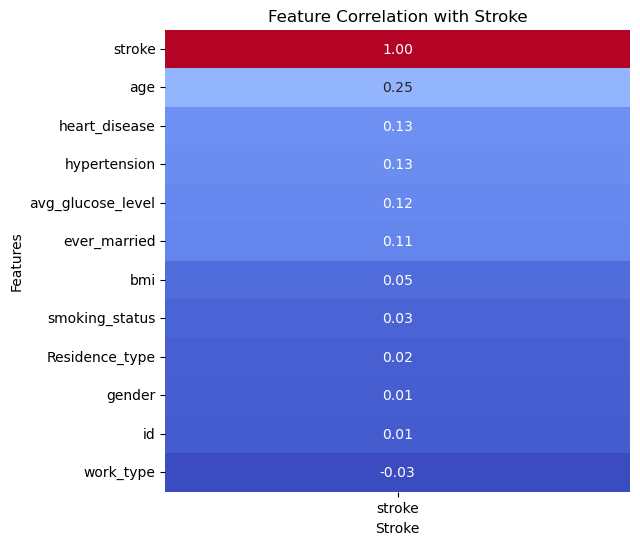

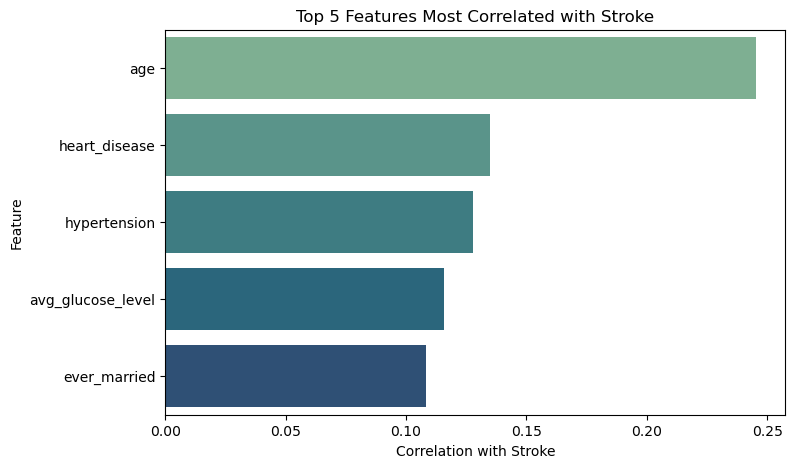

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve the original data
stroke_data_encoded = stroke_data.copy()

# ----------------------------------------
# ENCODE CATEGORICAL FEATURES
# ----------------------------------------
encoder = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_data_encoded[col] = encoder.fit_transform(stroke_data_encoded[col].astype(str))

# ----------------------------------------
# COMPUTE CORRELATION WITH TARGET
# ----------------------------------------
corr_matrix = stroke_data_encoded.corr()
corr_with_stroke = corr_matrix['stroke'].sort_values(ascending=False)

print("Correlation of all features with 'stroke':\n")
print(corr_with_stroke)

# ----------------------------------------
# VISUALIZE CORRELATION WITH TARGET ONLY
# ----------------------------------------
plt.figure(figsize=(6, 6))
sns.heatmap(corr_with_stroke.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Feature Correlation with Stroke")
plt.xlabel("Stroke")
plt.ylabel("Features")
plt.show()

# ----------------------------------------
# VISUALIZE TOP 5 FEATURES
# ----------------------------------------
top_features = corr_with_stroke.drop('stroke').head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    hue=top_features.index,
    palette='crest',
    legend=False
)
plt.title("Top 5 Features Most Correlated with Stroke")
plt.xlabel("Correlation with Stroke")
plt.ylabel("Feature")
plt.show()


##### DISTRIBUTION OF HEALTH-RELATED DATA POINTS

To understand the general health profile of individuals in the dataset, the distributions of key medical and demographic variables were examined after the data-cleaning process. These variables — including age, BMI, average glucose level, and hypertension — provide a foundational view of the population’s health characteristics and potential risk factors for stroke.

The age distribution shows a strong concentration in middle-aged and older adults, with relatively fewer young participants. This aligns with the fact that stroke is primarily an age-related condition, with risk increasing progressively as individuals get older.

The body mass index (BMI) distribution displays a near-normal pattern centered around healthy to slightly overweight ranges. After imputing missing BMI values, the overall shape of the distribution remained consistent, indicating that the imputation process preserved the natural variability in body composition.

The average glucose level distribution is slightly right-skewed, reflecting the presence of individuals with elevated glucose levels or diabetes — a known medical risk factor for stroke. Outlier capping helped reduce the influence of extreme values while maintaining the overall trend that higher glucose levels are less common but clinically significant.

For hypertension and heart disease, the distributions reveal that only a small portion of the population is affected, consistent with the lower base rates of these chronic conditions in general samples. However, as shown in the earlier correlation analysis, these conditions are disproportionately present among patients who experienced a stroke.

In summary, the post-cleaning distributions confirm that the dataset maintains realistic medical characteristics. The observed patterns — higher stroke prevalence among older individuals, those with higher glucose levels, and those with cardiovascular conditions — are in line with well-established healthcare research findings.

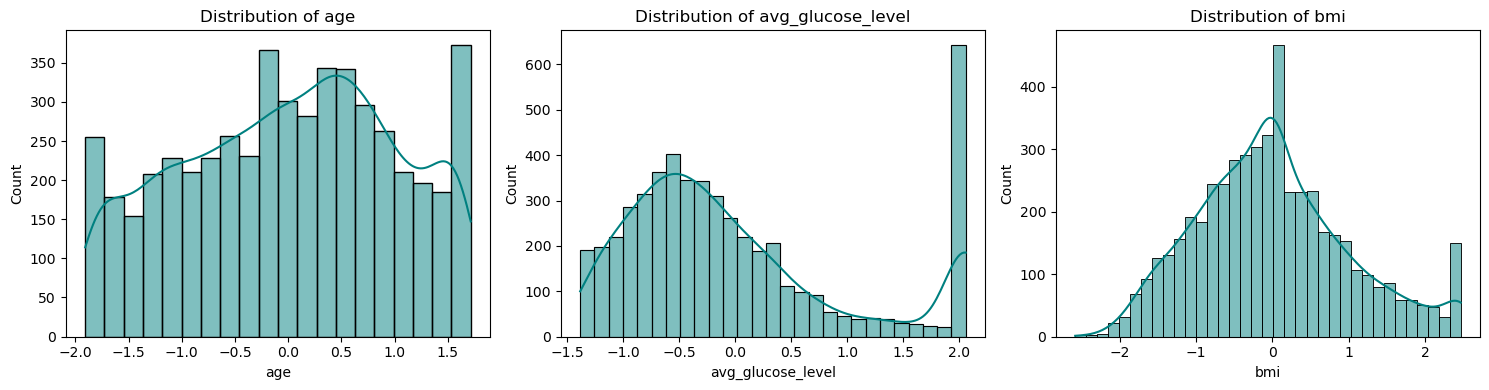

In [6]:
# Numerical
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(stroke_data[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

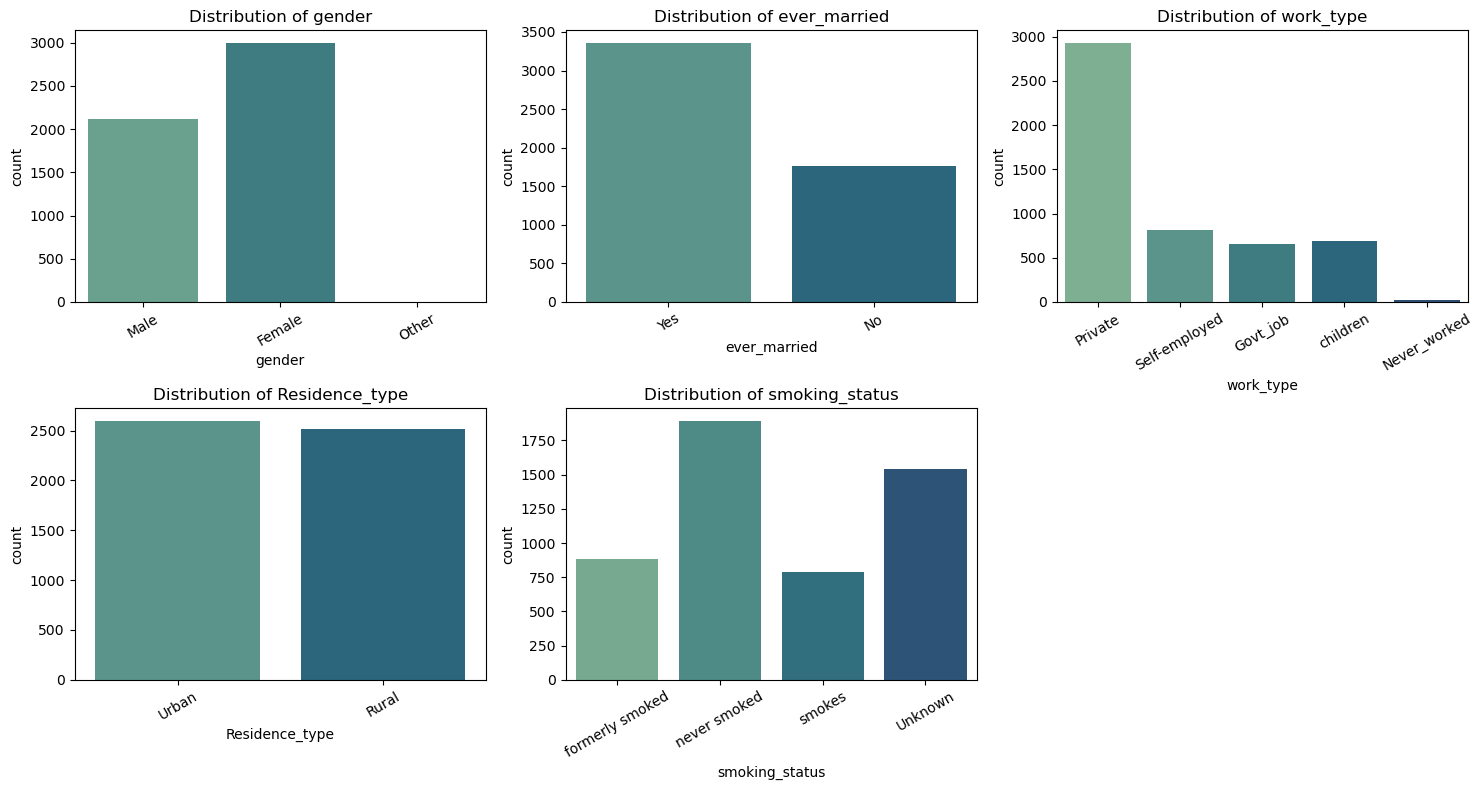

In [7]:
# Categorical
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(
        x=col,
        data=stroke_data,
        hue=col,
        palette='crest',
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Data Analysis
-----

##### Question 1

Question: Do urban or rural residents experience more strokes?

Why: Lifestyle differences might affect stroke occurrence.

How:

Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64


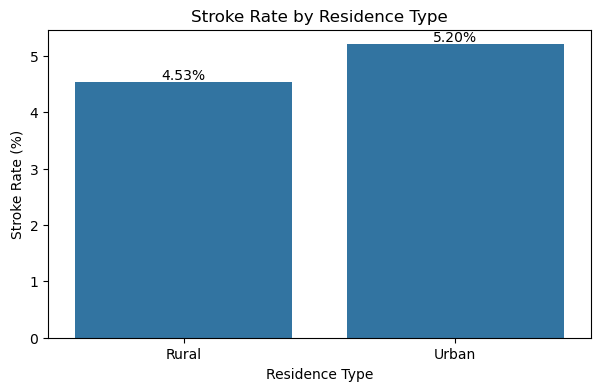

In [8]:
print(stroke_data.groupby('Residence_type')['stroke'].mean() * 100)


# Compute stroke rate (%) per residence type plot
stroke_rate = stroke_data.groupby('Residence_type')['stroke'].mean().reset_index()
stroke_rate['stroke'] *= 100  # convert to percentage

# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=stroke_rate, x='Residence_type', y='stroke' )
plt.title('Stroke Rate by Residence Type')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Residence Type')

# Add value labels on bars
for i, row in stroke_rate.iterrows():
    plt.text(i, row['stroke'] + 0.05, f"{row['stroke']:.2f}%", ha='center')

plt.show()

##### Question 2

Question: What percentage of smokers had a stroke vs. non-smokers?

Why: Smoking is a major risk factor for vascular disease.

How:

smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64


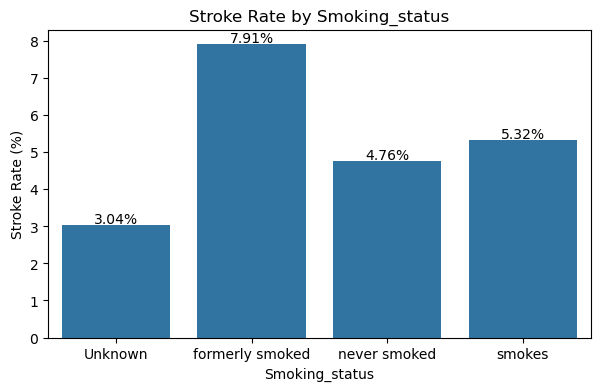

In [9]:
print(stroke_data.groupby('smoking_status')['stroke'].mean() * 100)


stroke_rate = stroke_data.groupby('smoking_status')['stroke'].mean().reset_index()
stroke_rate['stroke'] *= 100  # convert to percentage

# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=stroke_rate, x='smoking_status', y='stroke' )
plt.title('Stroke Rate by Smoking_status')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Smoking_status')

# Add value labels on bars
for i, row in stroke_rate.iterrows():
    plt.text(i, row['stroke'] + 0.05, f"{row['stroke']:.2f}%", ha='center')

plt.show()


##### Question 3


Question: Which occupation type has the highest stroke percentage?

Why: Stress levels or physical activity could matter.

How:

work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64


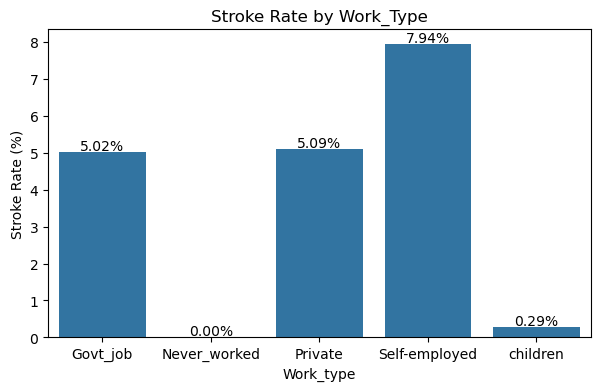

In [10]:
print(stroke_data.groupby('work_type')['stroke'].mean() * 100)

stroke_rate = stroke_data.groupby('work_type')['stroke'].mean().reset_index()
stroke_rate['stroke'] *= 100
# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=stroke_rate, x='work_type', y='stroke' )
plt.title('Stroke Rate by Work_Type')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Work_type')

# Add value labels on bars
for i, row in stroke_rate.iterrows():
    plt.text(i, row['stroke'] + 0.05, f"{row['stroke']:.2f}%", ha='center')

plt.show()


##### Question 4


Question: Which gender shows a higher stroke rate?

Why: Some studies suggest minor gender differences.

How:

gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64


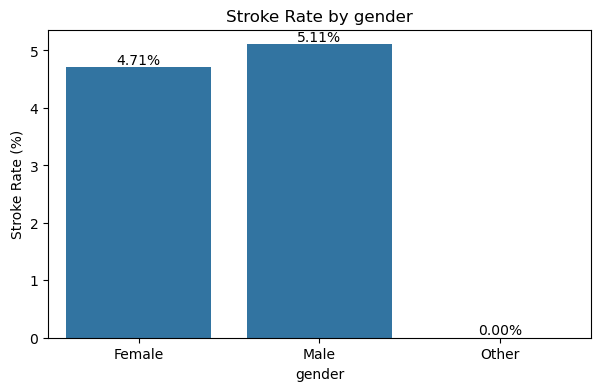

In [11]:
print(stroke_data.groupby('gender')['stroke'].mean() * 100)

stroke_rate = stroke_data.groupby('gender')['stroke'].mean().reset_index()
stroke_rate['stroke'] *= 100
# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=stroke_rate, x='gender', y='stroke' )
plt.title('Stroke Rate by gender')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('gender')

# Add value labels on bars
for i, row in stroke_rate.iterrows():
    plt.text(i, row['stroke'] + 0.05, f"{row['stroke']:.2f}%", ha='center')

plt.show()

##### Question 5

Question: What percentage of people with hypertension had a stroke compared to those without?

Why: High blood pressure is a major stroke risk factor.

How:

hypertension
0     3.967910
1    13.253012
Name: stroke, dtype: float64


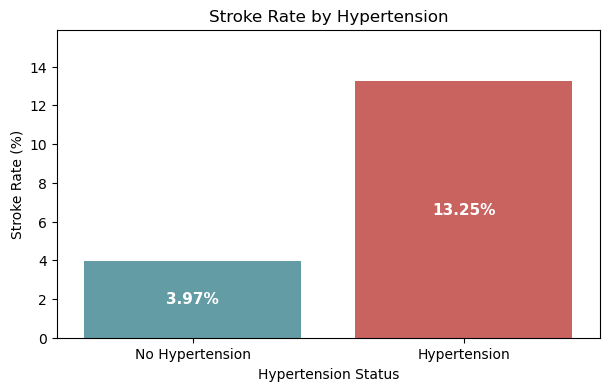

In [12]:
print(stroke_data.groupby('hypertension')['stroke'].mean() * 100)


stroke_rate = stroke_data.groupby('hypertension')['stroke'].mean().reset_index()
stroke_rate['stroke'] *= 100  # convert to %

# Map numeric labels to readable text
stroke_rate['hypertension'] = stroke_rate['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})

# --- Plot ---
plt.figure(figsize=(7,4))
ax = sns.barplot(data=stroke_rate, x='hypertension', y='stroke',
                 hue='hypertension', palette=['#58a4b0', '#d9534f'], legend=False)

plt.title('Stroke Rate by Hypertension')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Hypertension Status')

# Add percentage labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f"{height:.2f}%",
        ha='center', va='center', color='white', fontweight='bold', fontsize=11
    )

plt.ylim(0, max(stroke_rate['stroke']) * 1.2)
plt.show()


## 🧍‍♀️ Stroke Rate by Marital Status

This analysis explores how marital status (`ever_married`) relates to the likelihood of stroke.  
We calculate the mean stroke rate for each marital group and visualize the comparison.

Stroke rates (percent) by Marital Status:

  ever_married    stroke
0           No  1.650541
1          Yes  6.561288


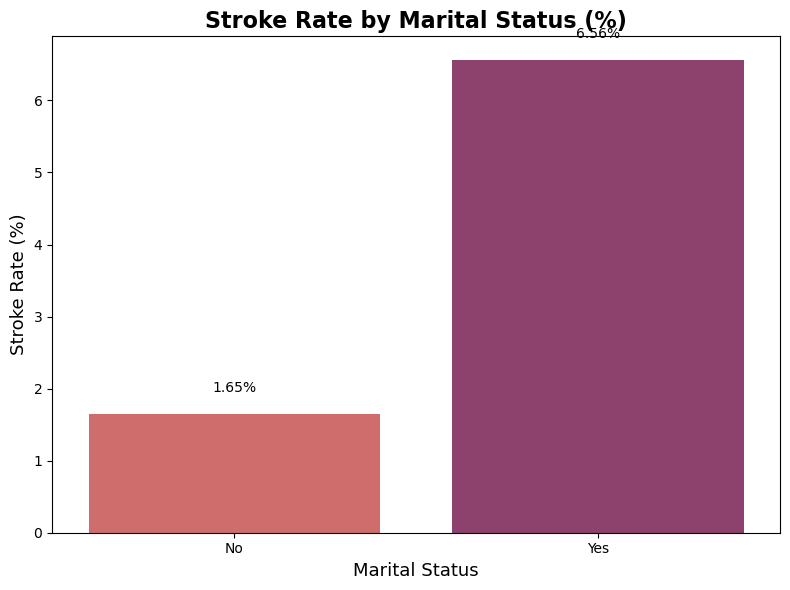

In [13]:
# ---- Group data by Ever Married ----
married_stroke = (
    stroke_data
    .groupby('ever_married', observed=True)['stroke']
    .mean()
    .reset_index()
)

# Convert stroke rate to percentage
married_stroke['stroke'] *= 100

# ---- Print the grouped results ----
print("Stroke rates (percent) by Marital Status:\n")
print(married_stroke)

# ---- Visualization ----
plt.figure(figsize=(8, 6))
sns.barplot(data=married_stroke, x='ever_married', y='stroke', hue='ever_married', palette='flare', legend=False)

plt.title('Stroke Rate by Marital Status (%)', fontsize=16, weight='bold')
plt.ylabel('Stroke Rate (%)', fontsize=13)
plt.xlabel('Marital Status', fontsize=13)

# Add percentage labels above bars
for i, row in married_stroke.iterrows():
    plt.text(i, row['stroke'] + 0.3, f"{row['stroke']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

plt.show()


## ⚖️ Stroke Rate by BMI Group

This section analyzes the relationship between **Body Mass Index (BMI)** and the likelihood of stroke.  
The BMI values are grouped into three categories — *Low*, *Normal*, and *High* — to observe differences in stroke occurrence.

Stroke rates (percent) by BMI Group:

     BMI_Group    stroke          BMI_Label
0  Underweight  2.315661      (<25.2 kg/m²)
1       Normal  7.042933  (25.2–32.3 kg/m²)
2   Overweight  4.857445  (32.3–39.4 kg/m²)
3        Obese  4.231626      (>39.4 kg/m²)


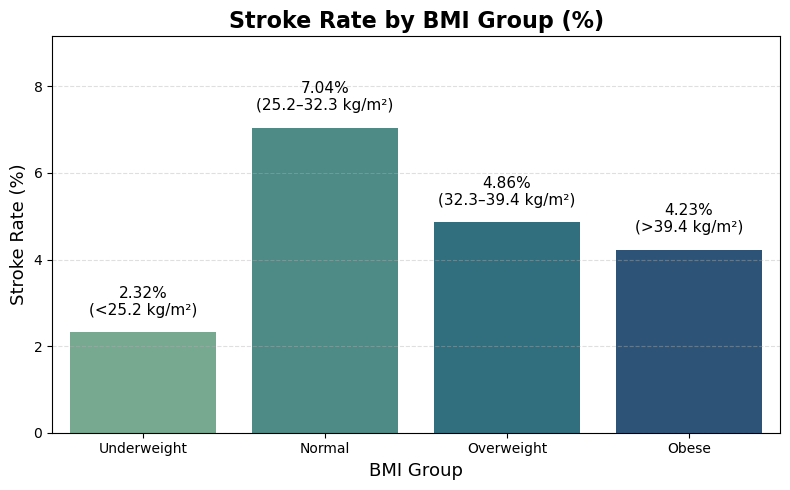

In [16]:
# ---- Create BMI Groups (for standardized BMI) ----
stroke_data['BMI_Group'] = pd.cut(
    stroke_data['bmi'],
    bins=[-float('inf'), -0.5, 0.5, 1.5, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# ---- Map readable BMI ranges ----
bmi_ranges = {
    'Underweight': '(<25.2 kg/m²)',
    'Normal': '(25.2–32.3 kg/m²)',
    'Overweight': '(32.3–39.4 kg/m²)',
    'Obese': '(>39.4 kg/m²)'
}

# ---- Group data and calculate stroke rate ----
bmi_stroke = (
    stroke_data
    .groupby('BMI_Group', observed=True)['stroke']
    .mean()
    .reset_index()
)
bmi_stroke['stroke'] *= 100
bmi_stroke['BMI_Label'] = bmi_stroke['BMI_Group'].map(bmi_ranges)

print("Stroke rates (percent) by BMI Group:\n")
print(bmi_stroke)

# ---- Visualization ----
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=bmi_stroke,
    x='BMI_Group',
    y='stroke',
    hue='BMI_Group',
    palette='crest',
    legend=False
)

plt.title('Stroke Rate by BMI Group (%)', fontsize=16, weight='bold')
plt.ylabel('Stroke Rate (%)', fontsize=13)
plt.xlabel('BMI Group', fontsize=13)
plt.ylim(0, bmi_stroke['stroke'].max() * 1.3)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i, row in bmi_stroke.iterrows():
    ax.text(i, row['stroke'] + 0.4,
            f"{row['stroke']:.2f}%\n{row['BMI_Label']}",
            ha='center', fontsize=11)

plt.tight_layout()
plt.show()



## ❤️‍🩹 Stroke Rate by Heart Disease Status

This section explores how **heart disease** affects the likelihood of having a stroke.  
By comparing individuals with and without heart disease, we can determine whether cardiovascular conditions increase stroke risk.


Stroke rates (percent) by Heart Disease:

   heart_disease     stroke
0              0   4.178734
1              1  17.028986


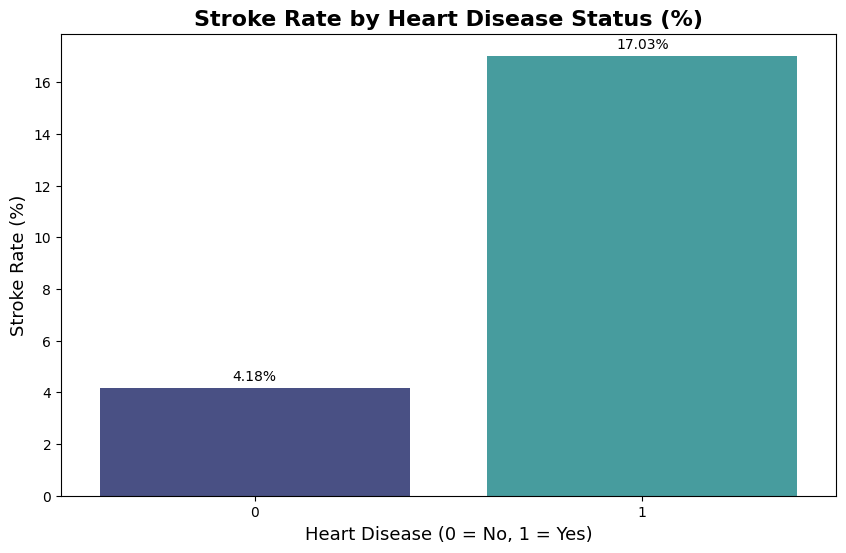

In [14]:
# ---- Group data by heart_disease ----
heart_stroke = (
    stroke_data
    .groupby('heart_disease', observed=True)['stroke']
    .mean()
    .reset_index()
)

# Convert to percentage
heart_stroke['stroke'] *= 100

# ---- Print the grouped results ----
print("Stroke rates (percent) by Heart Disease:\n")
print(heart_stroke)

# ---- Visualization ----
plt.figure(figsize=(10, 6))
sns.barplot(data=heart_stroke, x='heart_disease', y='stroke', hue='heart_disease', palette='mako', legend=False)
plt.title('Stroke Rate by Heart Disease Status (%)', fontsize=16, weight='bold')
plt.ylabel('Stroke Rate (%)', fontsize=13)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=13)

for i, row in heart_stroke.iterrows():
    plt.text(i, row['stroke'] + 0.3, f"{row['stroke']:.2f}%", ha='center')

plt.show()

## 🍬 Stroke Rate by Glucose Level Group

This section analyzes how **average glucose levels** relate to the likelihood of a stroke.  
Glucose levels are grouped into three categories — *Low*, *Normal*, and *High* — to identify whether higher glucose levels are linked to increased stroke risk.


Stroke rates (percent) by Glucose Level Group:

  Glucose_Level_Group    stroke   Glucose_Label
0                 Low  3.917526     (<85 mg/dL)
1              Normal  3.503504  (85–125 mg/dL)
2                High  8.788396    (>125 mg/dL)


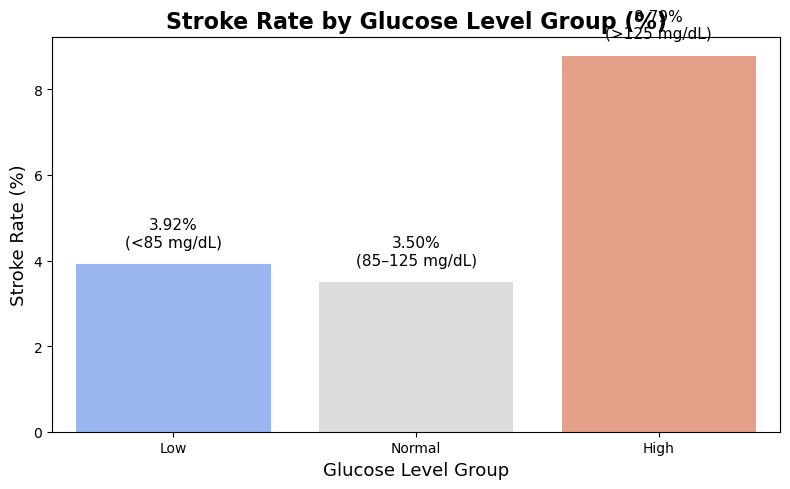

In [18]:
# ---- Compute Glucose Level stats ----
glucose_mean = stroke_data['avg_glucose_level'].mean()
glucose_std = stroke_data['avg_glucose_level'].std()

# ---- Create Glucose Level groups ----
stroke_data['Glucose_Level_Group'] = pd.cut(
    stroke_data['avg_glucose_level'],
    bins=[-float('inf'), -0.5, 0.5, float('inf')],
    labels=['Low', 'Normal', 'High']
)

# ---- Group data by Glucose_Level_Group ----
glucose_stroke = (
    stroke_data
    .groupby('Glucose_Level_Group', observed=True)['stroke']
    .mean()
    .reset_index()
)

# Convert stroke rate to percentage
glucose_stroke['stroke'] *= 100

# ---- Add readable glucose ranges ----
glucose_ranges = {
    'Low': '(<85 mg/dL)',
    'Normal': '(85–125 mg/dL)',
    'High': '(>125 mg/dL)'
}
glucose_stroke['Glucose_Label'] = glucose_stroke['Glucose_Level_Group'].map(glucose_ranges)

# ---- Print grouped results ----
print("Stroke rates (percent) by Glucose Level Group:\n")
print(glucose_stroke)

# ---- Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(
    data=glucose_stroke,
    x='Glucose_Level_Group',
    y='stroke',
    hue='Glucose_Level_Group',
    palette='coolwarm',
    legend=False
)

plt.title('Stroke Rate by Glucose Level Group (%)', fontsize=16, weight='bold')
plt.ylabel('Stroke Rate (%)', fontsize=13)
plt.xlabel('Glucose Level Group', fontsize=13)

# Add value labels
for i, row in glucose_stroke.iterrows():
    plt.text(i, row['stroke'] + 0.4,
             f"{row['stroke']:.2f}%\n{row['Glucose_Label']}",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()



## 👶🧓 Stroke Rate by Age Group

This section examines how **age** affects the likelihood of having a stroke.  
The data is divided into three age categories — *Younger*, *Middle-aged*, and *Older* — to explore whether stroke risk increases with age.


Stroke rates (percent) by Age Group:

     Age_Group     stroke    Age_Label
0      Younger   0.121286    (<32 yrs)
1  Middle-aged   2.080856  (32–55 yrs)
2        Older  11.916807    (>55 yrs)


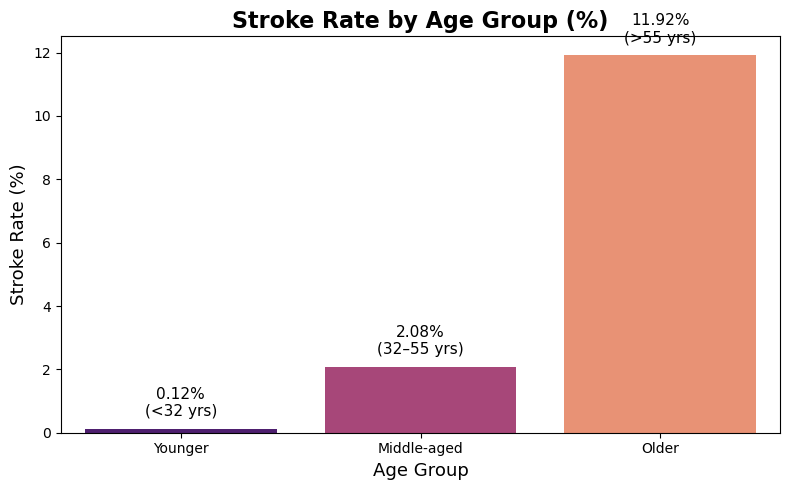

In [19]:
# ---- Create Age groups ----
stroke_data['Age_Group'] = pd.cut(
    stroke_data['age'],
    bins=[-2, -0.5, 0.5, 2],
    labels=['Younger', 'Middle-aged', 'Older']
)

# ---- Group data by Age_Group ----
age_stroke = (
    stroke_data
    .groupby('Age_Group', observed=True)['stroke']
    .mean()
    .reset_index()
)

# Convert stroke rate to percentage
age_stroke['stroke'] *= 100

# ---- Add readable age ranges ----
age_ranges = {
    'Younger': '(<32 yrs)',
    'Middle-aged': '(32–55 yrs)',
    'Older': '(>55 yrs)'
}
age_stroke['Age_Label'] = age_stroke['Age_Group'].map(age_ranges)

# ---- Print the grouped results ----
print("Stroke rates (percent) by Age Group:\n")
print(age_stroke)

# ---- Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(
    data=age_stroke,
    x='Age_Group',
    y='stroke',
    hue='Age_Group',
    palette='magma',
    legend=False
)

plt.title('Stroke Rate by Age Group (%)', fontsize = 16, weight = 'bold')
plt.ylabel('Stroke Rate (%)', fontsize = 13)
plt.xlabel('Age Group', fontsize = 13)

# Add percentage + age range labels above bars
for i, row in age_stroke.iterrows():
    plt.text(i, row['stroke'] + 0.4,
             f"{row['stroke']:.2f}%\n{row['Age_Label']}",
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()

